# Workshop Name: Subtitle [EDIT ME]

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* EDIT ME. At least 3, max 6, use [learning objective verbs](https://swcarpentry.github.io/swc-releases/2016.06/instructor-training/20-lessons/).
* EDIT ME. At least 3, max 6, use [learning objective verbs](https://swcarpentry.github.io/swc-releases/2016.06/instructor-training/20-lessons/).
* EDIT ME. At least 3, max 6, use [learning objective verbs](https://swcarpentry.github.io/swc-releases/2016.06/instructor-training/20-lessons/).
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

[NOTE: Remove icons if they're not used in the notebook]

### Sections
1. [Section Name - EDIT ME](#section1)
2. [Section Name - EDIT ME](#section2)
3. [Reflection: [Title of Reflection] - EDIT ME](#refl)
4. [Demo: [Title of Demo] - EDIT ME](#demo)

<a id='section1'></a>

# ChatGPT 

- Teaser: Build ChatGPT custom model  
- Explain stochastic process 
- ‘By the end you’ll understand this’


# History of GPT: Encoding Text

## One Hot Encoding (1970s - 2010s)

In order to appreciate how exciting it is to capture semantic content by numbers, you should know something about how words typically were represented by computers before the early 2010s.

In order to have computers work with text. the text must be represented by numbers somehow. **One-hot encoding** represents each word as a vector of the length of the vocabulary where only the position corresponding to the word is 1, and all other positions are 0:

In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample vocabulary
vocabulary = ['cat', 'dog', 'apple', 'orange']

# One-hot encode the vocabulary
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(np.array(vocabulary).reshape(-1, 1))

# Display one-hot encoding
print("One-Hot Encoding:")
for word, encoding in zip(vocabulary, onehot_encoded):
    print(f"{word}: {encoding}")


One-Hot Encoding:
cat: [0. 1. 0. 0.]
dog: [0. 0. 1. 0.]
apple: [1. 0. 0. 0.]
orange: [0. 0. 0. 1.]


/Users/tomvannuenen/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For a long time, these one-hot vectors were used as input features for various machine learning models. For example, in text classification tasks, a document or a sentence could be represented as a bag of words, where each word is a one-hot encoded vector. The model would then learn to classify the text based on these features.

The method also had some pretty serious limitations, however:

1. **High dimensionality**. Vocabularies of a language dataset can contain anything between 20 thousand and 13 million words. That’s a big vector!
2. **Semantics**. Even though we have a numerical representation of the word ‘cat’ here, it doesn’t help us much. What this method lacks is a representation of semantic relationships between words.

## Enter Word Embeddings (early 2010s)

> “You shall know a word by the company it keeps” (JR Firth 1957) 

The introduction of Word2Vec by a team at Google in 2013 marked a significant shift in the field. Word2Vec is a method to create **word embeddings**. This means to represent words in **dense vector spaces**. That means not a bunch of 0s and a 1, like we just saw, but a lot of values in one vector for every single word.

Word2vec uses shallow neural networks that map a word (or words) to a target variable which is also a word (or multiple words). We either try to predict the probability of a word given a context, or to predict the probability of a context given a word. We do so within a particular window size or radius of every word. As is typical in machine learning, we also make use of a cost function, which is basically a way of telling our AI system where it can improve its performance. If you want to know more about how this particular type of neural network works, check out [this post](https://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/) by Chris McCormick.

Word2Vec requires a large dataset and a good amount of computation! But when all is said and done, Word2Vec represents words in a vector space where semantically similar words are mapped to nearby points. This means we can start looking at similarity measures.  

Word Embeddings were a major advancement over one-hot encoding and quickly gained popularity in the NLP community.

In [5]:
from gensim.models import Word2Vec

# Sample sentences
sentences = [['cat', 'sat', 'on', 'the', 'mat'], 
             ['dog', 'sat', 'on', 'the', 'rug'],
             ['apple', 'is', 'a', 'fruit'],
             ['orange', 'is', 'also', 'a', 'fruit']]

# Train a Word2Vec model
# Note that we are setting `vector_size` to `10` meaning each word will be represented by a vector (a list) with 10 numbers.
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, workers=1)

# Get vectors for some words
word_vectors = model.wv
print("\nWord2Vec Vectors:")
for word in ['cat', 'dog', 'mat', 'rug']:
    print(f"{word}: {word_vectors[word]}")



Word2Vec Vectors:
cat: [ 0.02348376 -0.04519032  0.08388732 -0.09858163  0.06764641  0.02914417
 -0.04932832  0.04398187 -0.01739575  0.06711384]
dog: [-0.08619688  0.03665738  0.05189884  0.05741938  0.07466918 -0.06167675
  0.01105614  0.06047282 -0.0284005  -0.06173522]
mat: [-0.00410223 -0.08368949 -0.05600012  0.07104538  0.0335254   0.0722567
  0.06800248  0.07530741 -0.03789154 -0.00561806]
rug: [ 0.01631476  0.00189917  0.03473637  0.00217777  0.09618826  0.05060603
 -0.0891739  -0.0704156   0.00901456  0.06392534]


We just trained a Word2Vec model. As you can see, each word here is now represented by 10 numbers, or "dimensions". Imagine mapping that onto a visualization--it would be very hard! Humans cannot really understand things beyond 3-dimensional representation.

To visualize Word2Vec embeddings in a 2D space, we can use dimensionality reduction techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding). These techniques reduce the high-dimensional Word2Vec vectors to two dimensions, which can be plotted. This visualization helps to see how words with similar meanings are positioned closer in the vector space.

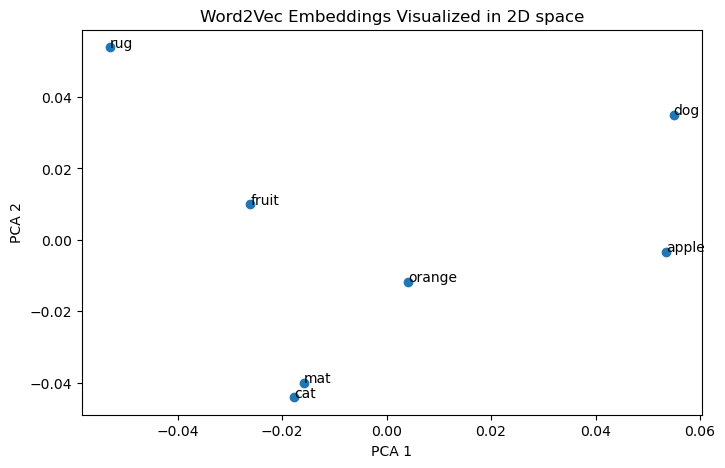

In [4]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample sentences
sentences = [['cat', 'sat', 'on', 'the', 'mat'], 
             ['dog', 'sat', 'on', 'the', 'rug'],
             ['apple', 'is', 'a', 'fruit'],
             ['orange', 'is', 'also', 'a', 'fruit']]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=1)

# Words to visualize
words = ['cat', 'dog', 'mat', 'rug', 'apple', 'orange', 'fruit']

# Get corresponding Word2Vec vectors
word_vectors = [model.wv[word] for word in words]

# Perform PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Create a scatter plot of the projection
plt.figure(figsize=(8, 5))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title('Word2Vec Embeddings Visualized in 2D space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


While embeddings capture word-level relationships, they don't inherently account for word order or context beyond a fixed window. The next thing NLP had to figure out was how to handle sequence data and remember context over longer periods.

# LSTMs (1997, Popularized in 2010s)

Word embeddings provide static representations of words. LSTMs use these embeddings but add the ability to understand sequence and context over time. GPT models take this further by providing dynamic, context-dependent embeddings.

Below is an example of how Long Short-Term Memory (LSTM) networks build on word embeddings to capture sequence and context over time.

Embedding Layer: The Embedding layer transforms word indices (representing words in your text) into word embeddings. It takes three arguments: the size of the vocabulary (vocab_size), the dimensionality of the embeddings (embedding_dim), and the maximum length of input sequences (max_length).

LSTM Layer: The LSTM layer then processes these embeddings. The LSTM units can capture dependencies and context over time within the sequence. The number of LSTM units (lstm_units) is a parameter that can be adjusted based on the complexity of the task and the size of the dataset.

Dense Layer: Finally, a Dense layer is used for the classification task (binary classification in this case, hence the sigmoid activation function).



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Sample parameters
vocab_size = 10000  # Size of the vocabulary
embedding_dim = 128  # Dimension of the word embeddings
max_length = 100    # Maximum length of a sequence
lstm_units = 32     # Number of units in the LSTM layer

# Create the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1300641 (4.96 MB)
Trainable params: 1300641 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Think of LSTM as reading a book one word at a time, from start to finish. It tries to remember important stuff from earlier (long-term memory) but sometimes forgets things if the book is really long. If a crucial piece of information was at the beginning of the book and it's needed at the end, the LSTM might struggle to remember it.

To show this, let's generate sequences of binary values (0s and 1s). The target label for each sequence is the first element of the sequence.
We then train an LSTM model to predict this target. The challenge for the LSTM is to remember the first element of the sequence throughout all time steps.
The `seq_length` is set to 100, which is relatively long and may challenge the LSTM's ability to remember the context from the start of the sequence.

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to generate simple sequences
def generate_sequence(length):
    return np.random.choice(2, length)

# Generate a dataset of sequences
def generate_data(num_samples, seq_length):
    X, y = [], []
    for _ in range(num_samples):
        seq = generate_sequence(seq_length)
        # Target depends on the first element
        target = seq[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Model parameters
seq_length = 100   # Length of each input sequence
num_samples = 1000 # Number of samples in the dataset

# Generate data
X, y = generate_data(num_samples, seq_length)
X = np.expand_dims(X, -1) # Reshape for LSTM (samples, time steps, features)

# Define the model
model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/10
32/32 [==============================] - 1s 15ms/step - loss: 0.6940 - accuracy: 0.4900
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 3/10
32/32 [==============================] - 0s 15ms/step - loss: 0.6939 - accuracy: 0.4770
Epoch 4/10
32/32 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.5060
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 0.6930 - accuracy: 0.5110
Epoch 6/10
32/32 [==============================] - 0s 15ms/step - loss: 0.6926 - accuracy: 0.5130
Epoch 7/10
32/32 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5070
Epoch 8/10
32/32 [==============================] - 0s 14ms/step - loss: 0.6927 - accuracy: 0.5120
Epoch 9/10
32/32 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5150
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5060
Loss: 0.69

## Transformer Architecture

The Transformer architecture, introduced in the paper "Attention Is All You Need" by Vaswani et al. in 2017, addresses the issue of long-term dependencies that can be challenging for LSTM networks. 

Transformers use a self-attention mechanism that allows each position in the sequence to attend to all positions in the previous layer of the sequence simultaneously. This mechanism effectively captures dependencies, regardless of their distance in the sequence.

The Transformer, on the other hand, is like having the ability to look at any page in the book at any time when making a decision about a particular word or sentence. It can easily refer back to something it saw much earlier. It also doesn't read word by word from start to finish. Instead, it looks at the whole page (or even the whole book) at once and decides which words are important to focus on.

The transformer architecture makes use of **encoder** and **decoder**.

- Encoder: The encoder in a Transformer model processes the input data (like a sentence in a text). It analyzes and understands the context and relationships between words or tokens in the input. The encoder transforms the input into an intermediate representation that captures this information.

- Decoder: The decoder takes the intermediate representation from the encoder and generates the output data (like the translated text in another language). In the original Transformer model (used for tasks like translation), the decoder is responsible for producing a sequence based on the encoder's representation.

Let's use a Transformer model for a simple text classification task:

In [ ]:
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
import tensorflow as tf
import numpy as np

# Sample text
texts = ["This is a great movie", "This is a terrible movie"]

# Load pre-trained model and tokenizer
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize text
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")

# Predict using the model
outputs = model(inputs)

# Process the output
predictions = tf.nn.softmax(outputs.logits, axis=-1)
labels = ['Negative', 'Positive']
predicted_labels = [labels[np.argmax(p)] for p in predictions]

# Print predictions
for text, label in zip(texts, predicted_labels):
    print(f"Text: {text}, Predicted Sentiment: {label}")


We use the `TFDistilBertForSequenceClassification` model, a distilled version of BERT that's faster and smaller but still very powerful.
We use the DistilBertTokenizer to tokenize our input texts. The tokenizer handles the necessary processing like tokenization, padding, and adding special tokens.
The model then makes predictions on the inputs. The output logits are converted to probabilities using a softmax function.
Finally, we print the predicted sentiment for each piece of text.

# GPT

GPT models are based on the decoder part of the original Transformer architecture. Unlike the full Transformer model that has both encoder and decoder components (used for tasks like translation), GPT only uses the decoder stack.

Why? GPT's primary function is to generate text sequentially, predicting the next word based on the previous words. This is a task well-suited to the decoder component of the Transformer, which is inherently designed to generate sequences.

In GPT, each token (word) can only attend to previous tokens in the sequence. This is known as causal or unidirectional language modeling, suitable for generating text.

One of the key innovations of GPT is its approach to training, which involves two stages: pre-training and fine-tuning.

- Pre-training: GPT models are pre-trained on a large corpus of text in an unsupervised manner. During this stage, the model learns a general understanding of language, grammar, and knowledge from the training data.
- Fine-tuning: After pre-training, GPT is fine-tuned on specific tasks (like question answering, text generation, etc.) using supervised learning. This involves training on a smaller, task-specific dataset.


In [38]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, GPT2LMHeadModel

tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")

prompt = 'it was a dark and stormy night'     

# generate the result with contrastive search
input_ids = tokenizer(prompt, return_tensors='pt').input_ids
input_ids

tensor([[ 270,  373,  257, 3223,  290, 6388,   88, 1755]])

`tokenizer(prompt, return_tensors='pt')`: We use the tokenizer to convert the prompt text into a format that the model can understand. The tokenizer performs several steps, including splitting the text into tokens (words or subwords), converting these tokens into numerical IDs (tokenization), and preparing these token IDs in a tensor format suitable for PyTorch `(return_tensors='pt')`.

`.input_ids`: This extracts just the input IDs from the tokenized output. These IDs are what the model actually processes to generate predictions.


In [43]:
temperature = 0.9             # a higher temperature will produce more diverse results, but with a higher risk of less coherent text
top_k = 8                     # the number of tokens to sample from at each step
max_length = 80               # the maximum number of tokens for the output of the model

output = model.generate(input_ids, do_sample=True, temperature=temperature, top_k=top_k, max_length=max_length)
output

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[  270,   373,   257,  3223,   290,  6388,    88,  1755,    13,   317,
          1862,  2415,   373,  5055,   287,   262, 32439,   286,   262,  2156,
            13,  1375,   373,  5762,   607,  2330,  6576,   290,   607,  4171,
          6576,    11,   290,   673,   550,   587,  5762,   257,  2330,  6576,
            13,  1375,   550,  3750,   656,   262,  2119,   290,  3114,   379,
          5223,   287,   257,  1657,    11,   290,   673,   531,    11,   705,
          2061,   716,   314,  5762,  8348,   705,  2061,   716,   314,  1804,
          8348,   705,  2061,   716,   314,  1804,  8348,   705,  5195,  8348]])

`model.generate(...)`: This function call tells the model to generate text based on the provided input_ids.

In [47]:
# we use a loop since model.generate  can produce multiple sequences of text when the num_return_sequences parameter 
# is set to a value greater than 1

for i, sequence in enumerate(output):
    decoded_sequence = tokenizer.decode(sequence, skip_special_tokens=True)
    print(f"Generated text {i+1}:")
    print(decoded_sequence)
    print("\n")

Generated text 1:
it was a dark and stormy night. A young woman was standing in the doorway of the house. She was wearing her white dress and her blue dress, and she had been wearing a white dress. She had gone into the room and looked at herself in a light, and she said, 'What am I wearing?' 'What am I doing?' 'What am I doing?' 'Why?'




## Generating Multiple Outputs

In [19]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
# Set the seed for reproducibility
seed_value = 42
torch.manual_seed(seed_value)
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")
prompt = 'it was a dark and stormy night'
temperature = 0.9
top_k = 8
max_length = 80
repetition_penalty = 1
num_return_sequences = 5
input_ids = tokenizer(prompt, return_tensors='pt').input_ids
output = model.generate(input_ids,
                        do_sample=True,
                        temperature=temperature,
                        top_k=top_k,
                        max_length=max_length,
                        num_return_sequences=num_return_sequences,
                        repetition_penalty=repetition_penalty,
                        penalty_alpha=0.6,
                        no_repeat_ngram_size=1,
                        early_stopping=True)
# Decoding the output to text
for i in range(num_return_sequences):
    print(f"Generated text {i+1}:")
    print(tokenizer.decode(output[i], skip_special_tokens=True))
    print("\n")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text 1:
it was a dark and stormy night. It felt like nothing could be done, but it didn't take long for the darkness to come in from within."
"I don`t know what happened when I first started playing with him at all," said Shizaki-kun's sister Taroya who had just arrived on her way home as they were leaving their school together after having been


Generated text 2:
it was a dark and stormy night. I could hear the voice of his son's mother screaming as if he had died from an overdose, but it sounded like something were going on inside him."
He continued to cry in agony until one moment - "I'm not even sure what happened here or why they didn't let me see this," she recalled at least once before leaving with another baby


Generated text 3:
it was a dark and stormy night in which the two met, but he could only find one man for himself.
"The sun went down to its highest point of view before we had been there," said Lauda who watched as she saw him from behind her back: "I didn't

## Controlling the Randomness

As we have seen, the process of word generation inherently includes randomness. The question, then, is how we can control that randomness. GPT2 has several parameters to do so.

Temperature: The `temperature` parameter is used to control the randomness in the probability distribution of the next word predictions. A low temperature (close to 0) makes the model more confident in its top choices (more deterministic), leading to less random and more predictable text. As the temperature increases, the model's predictions become more random and diverse. Essentially, temperature "flattens" or "sharpens" the probability distribution. A high temperature gives lower-probability words more chance of being chosen, while a low temperature makes the model strongly favor high-probability words.

Top-K Sampling (top_k): `top_k sampling` limits the model's next-word predictions to the top k most likely words. Only the k most probable next words are considered for each step in the generation process. This can help to focus the generation on more likely words and avoid the model going off on a tangent with less probable, irrelevant words. However, `top_k` sampling does not consider the cumulative probability of the words, so even very low-probability words might be included if they are among the top k.

Nucleus Sampling (top_p): `top_p sampling`, also known as nucleus sampling, considers the cumulative probability of the words.
It selects the smallest set of words whose cumulative probability exceeds the threshold p. This means it dynamically adjusts the number of words it considers based on their probability distribution. `top_p` provides a more dynamic approach compared to `top_k` as it can include more or fewer words depending on their probability distribution for each prediction.

In [1]:
from transformers import pipeline

text_generator = pipeline("text-generation", model="gpt2")

prompt = "Life on Mars could"
params = [
    {"temperature": 0.7, "top_p": 0.8, "top_k": 40},
    {"temperature": 0.9, "top_p": 0.9, "top_k": 80},
    {"temperature": 1.1, "top_p": 0.95, "top_k": 120}
]

for param in params:
    output = text_generator(prompt, max_length=50, temperature=param['temperature'], top_p=param['top_p'], top_k=param['top_k'])[0]['generated_text']
    print(f"Output with temperature = {param['temperature']}, top_p = {param['top_p']}, and top_k = {param['top_k']}:\n{output}\n")


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output with temperature = 0.7, top_p = 0.8, and top_k = 40:
Life on Mars could also help people get to Mars and find out if they are alive, the scientists said.

The team is now looking for signs of life on Mars, including evidence of microbes that could be making their way to Earth.




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output with temperature = 0.9, top_p = 0.9, and top_k = 80:
Life on Mars could be the most important research on the planet for decades to come."

A report by the NASA Jet Propulsion Laboratory's Spitzer Space Telescope team suggests that the "Mars-bound" asteroid has already reached the surface. In

Output with temperature = 1.1, top_p = 0.95, and top_k = 120:
Life on Mars could have been considered in a much broader sense.


"During the cold war, that was the last attempt to save mankind, on Mars," he told Space.com in a November 23 email. But now that the program is



### 💡 Tip: Value Ranges for Temperature, Top-K Sampling and Nucleus Sampling

#### Temperature:

**Minimum Value**: Technically, the temperature can be set to a value greater than 0. A value of 0 is not practical, as it would lead to division by zero in the softmax calculation. Practically, values close to 0 (e.g., 0.1) are used to make the model very confident, leading to repetitive and predictable text.

**Maximum Value**: There is no fixed upper limit for temperature, but extremely high values (e.g., above 2 or 3) make the model's output extremely random and incoherent. Commonly, values are kept between 0.7 and 1.5 for reasonable variation in text generation.

#### Top-K Sampling (top_k):

**Minimum Value**: The minimum value is 0, which effectively turns off top-k sampling. This means all words are considered, regardless of their probability.

**Maximum Value**: The maximum value is theoretically the size of the model's vocabulary. For GPT-2, this is around 50,000. Setting top_k to a very high value is equivalent to not using top-k sampling at all.

#### Nucleus Sampling (top_p):

**Minimum Value**: The minimum is 0, which would mean no words are selected, leading to no generation. In practice, a very low value (close to 0) would lead to extremely conservative text generation, with little to no variation.

**Maximum Value**: The maximum is 1, which means all words summing up to 100% of the probability distribution are considered. Setting top_p to 1 effectively turns off nucleus sampling, as the entire probability distribution is used.


# Comparing Models

## Plotting Embeddings Between Models

Some weights of the model checkpoint at distilgpt2 were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


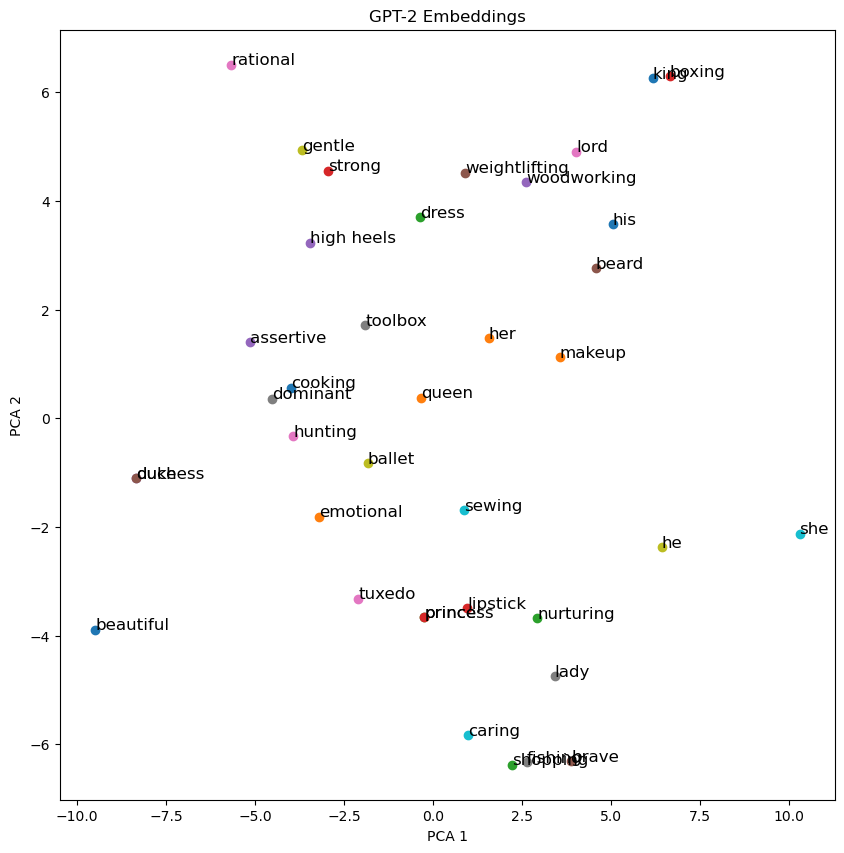

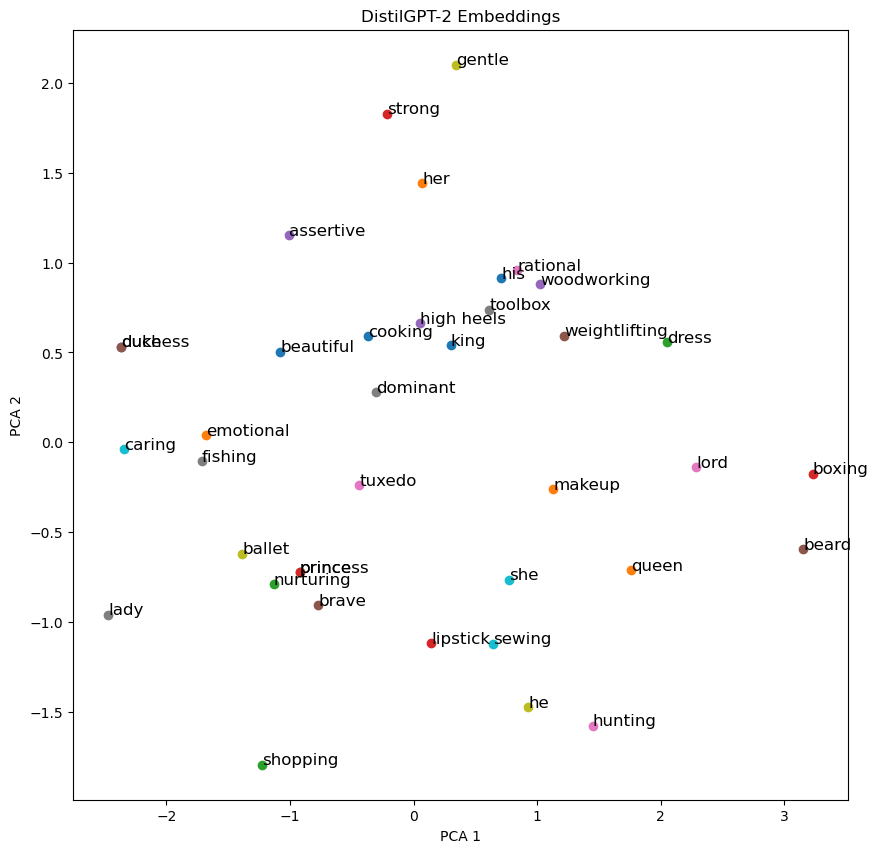

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import GPT2Model, GPT2Tokenizer, AutoModel, AutoTokenizer

# Set seed for reproducibility
seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)

def get_embeddings(model, tokenizer, text):
    encoded_input = tokenizer(text, return_tensors='pt', padding=True)
    with torch.no_grad():
        model_output = model(**encoded_input)
    return model_output.last_hidden_state[:, 0, :]

def plot_embeddings(embeddings, text, title):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(text):
        plt.scatter(pca_result[i, 0], pca_result[i, 1])
        plt.text(pca_result[i, 0], pca_result[i, 1], word, fontsize=12)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(title)
    plt.show()

# Text to be visualized
# Updated list of words for visualization
text = ["king", "queen", "prince", "princess", "duke", "duchess", "lord", "lady",
        "gentle", "caring", "beautiful", "emotional", "nurturing", 
        "strong", "assertive", "brave", "rational", "dominant",
        "ballet", "sewing", "cooking", "makeup", "shopping",
        "boxing", "woodworking", "weightlifting", "hunting", "fishing",
        "he", "she", "his", "her", "dress", "lipstick", "high heels",
        "beard", "tuxedo", "toolbox"]

# Load GPT-2 model and tokenizer, set pad token
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
gpt2_model = GPT2Model.from_pretrained("gpt2")

# Load DistilGPT-2 model and tokenizer, set pad token
distilgpt2_tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
distilgpt2_tokenizer.pad_token = distilgpt2_tokenizer.eos_token
distilgpt2_model = AutoModel.from_pretrained("distilgpt2")

# Get embeddings from both models
gpt2_embeddings = get_embeddings(gpt2_model, gpt2_tokenizer, text)
distilgpt2_embeddings = get_embeddings(distilgpt2_model, distilgpt2_tokenizer, text)

# Plot embeddings
plot_embeddings(gpt2_embeddings, text, "GPT-2 Embeddings")
plot_embeddings(distilgpt2_embeddings, text, "DistilGPT-2 Embeddings")


## Comparing Outputs from Different Models

In [23]:
from transformers import pipeline

# Set up pipelines for two different models
gpt2_pipeline = pipeline("text-generation", model="gpt2")
distilgpt2_pipeline = pipeline("text-generation", model="distilgpt2")

prompt = "The future of AI in healthcare"

# Generate text from GPT-2
gpt2_output = gpt2_pipeline(prompt, max_length=50)[0]['generated_text']

# Generate text from DistilGPT-2
distilgpt2_output = distilgpt2_pipeline(prompt, max_length=50)[0]['generated_text']

print("GPT-2 Output:\n", gpt2_output)
print("\nDistilGPT-2 Output:\n", distilgpt2_output)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT-2 Output:
 The future of AI in healthcare seems bright.

For a few reasons, it does seem increasingly obvious that AI isn't so far above our current limitations as the technology that saves lives. When one compares the cost of AI with human doctors, physicians

DistilGPT-2 Output:
 The future of AI in healthcare, and research. As a whole, this is very valuable to our scientific community.


# Sentiment analysis

In [ ]:
from transformers import pipeline

# Text generation pipeline
text_generator = pipeline("text-generation", model="gpt2")

# Sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

prompt = "The movie I watched yesterday"

# Generate a movie review
generated_review = text_generator(prompt, max_length=50)[0]['generated_text']

# Analyze the sentiment of the generated review
sentiment = sentiment_analyzer(generated_review)

print("Generated Review:\n", generated_review)
print("\nSentiment Analysis Result:\n", sentiment)


<div class="alert alert-success">

## ❗ Key Points

* EDIT ME. Recap the most useful information in this notebook. Keep it short and use action words. Min 3, max 8.
* EDIT ME. Recap the most useful information in this notebook. Keep it short and use action words. Min 3, max 8.
* EDIT ME. Recap the most useful information in this notebook. Keep it short and use action words. Min 3, max 8.

</div>